<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/05%20Deep%20Learning/Notebooks/CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="100%" src="../img/data_science_rec.jpg"/> <br> <br>Redes Neuronales con Keras y Tensorflow III</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Referencias bibliográficas y sitios de interés</u>:
* Ian Goodfellow, Yoshua Bengio, and Aaron Courville. 2016. Deep Learning. The MIT Press.
* [Keras an API for Tensorflow](https://keras.io/getting_started/)
* [Tensorflow: end-to-end open source machine learning platform](https://www.tensorflow.org/)
* [Deep Learning with Keras and TensorFlow](https://www2.mpia-hd.mpg.de/homes/dgoulier/MLClasses/Course%20-%20Deep%20Learning%20with%20Keras%20and%20TensorFlow%20-%20Part%201.html)
* [Train a simple deep CNN on the CIFAR10 small images dataset.](https://keras.io/examples/cifar10_cnn/)

# [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images divided into five training batches and one test batch, each with 10000 images.

The dataset was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton and is available at cs.totonto.edu as well as through the datasets module in keras through the keras.datasets module.

In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


## Módulos de Cómputo Científico

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Datos de entrenamiento

In [3]:
# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'ejemplos de entrenamiento')
print(X_test.shape[0], 'ejemplos de prueba')

X_train shape: (50000, 32, 32, 3)
50000 ejemplos de entrenamiento
10000 ejemplos de prueba


In [4]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(50000, 10)


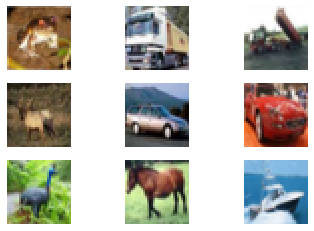

In [5]:
# visualización de los datos
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
    plt.axis('off')

plt.show()

# 2. Modelo

In [6]:
# Librerías para el diseño de modelos secuenciales
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import tensorflow as tf
# para evitar warnings...      
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

from numpy.random import seed
seed(1)

## Definición del modelo

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

* Nota que la profundidad de los mapas de características aumenta progresivamente en la red (de 32 a 64 canales), mientras que el tamaño de los mapas de características disminuye (de 32 x 32 a 6 x 6). Este es un patrón que se ve en muchas redes convolucionales.

* Finalmente, dado que estamos abordando un problema de clasificación multiclase, estamos terminando la red con una capa "Fully-connected" (*Dense*) de tamaño 10 con una activación de tipo softmax. Esta capa codificará la probabilidad de cada una de las clases.

* La siguiente figura ilustra cómo se calcula el tamaño (shape) de cada capa:
<br>
<img align="left" width="100%" src="../img/CNN_DIM.png"/>
<br>
* El número de parámetros, por su parte, se calcula así:
<br>
<img align="left" width="70%" src="../img/CNN_PAR.png"/>

## Configuración del aprendizaje

In [ ]:
# Optimizadores: Ref. https://ruder.io/optimizing-gradient-descent/index.html#fn12
# - SGD: θ=θ−η⋅∇θJ(θ;x(i);y(i)).

# - adagrad: gt,i=∇θJ(θt,i). θt+1=θt−η/√G+ϵ⋅g. G∈Rd×d here is a diagonal matrix 
#   where each diagonal element i,i is the sum of the squares of the gradients 
#   w.r.t. θi up to time step t.

# - RMSprop: E[g^2](t)=0.9E[g^2](t−1)+0.1g^2 θt+1=θt−η√{E[g^2](t)+ϵ} g(t)
#   RMSprop divides the learning rate by an exponentially decaying average 
#   of squared gradients. Hinton suggests γ to be set to 0.9, while a good 
#   default value for the learning rate η is 0.001.


from keras.optimizers import SGD, RMSprop, adagrad
from keras.callbacks import ModelCheckpoint

# checkpoint: guarda el mejor modelo
ckpt_model = 'modelo-cnn.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

#Compila el modelo
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('Listo')

## &#9998; Entrenamiento (iteración)

In [ ]:
# Hiper-parámetros
EPOCAS = 10
BATCH  = 32

history = model.fit(X_train, y_train,
          batch_size=BATCH,
          epochs=EPOCAS,
          validation_data=(X_test, y_test),
          shuffle=True)

# Save model and weights
model.save('keras_cifar10_model.h5')

### Verificación de resultados

In [ ]:
# Score trained model.
print(model.metrics_names)
score = model.evaluate(X_test, y_test)
print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Error')
plt.ylabel('error')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='upper right')

In [ ]:
fig.savefig('CNN_Loss.png',
            bbox_inches='tight',
            pad_inches = 0)